<a href="https://colab.research.google.com/github/archit-awasthi007/fake_news_detection/blob/main/fake_news.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
import re
from wordcloud import WordCloud
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, LSTM, Conv1D, MaxPool1D

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score

In [3]:
fake = pd. read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/Fake.csv')
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


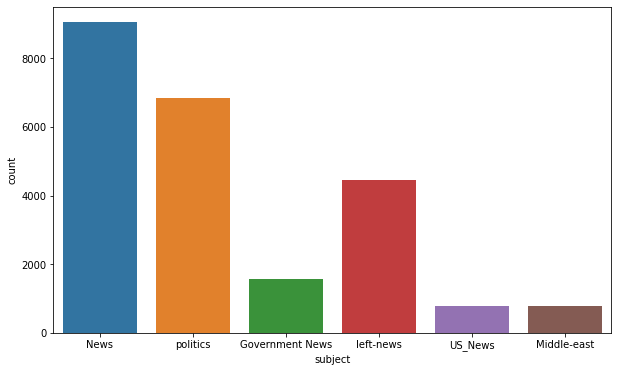

In [4]:
plt.figure (figsize=(10,6))
sns.countplot(x= 'subject' , data=fake);

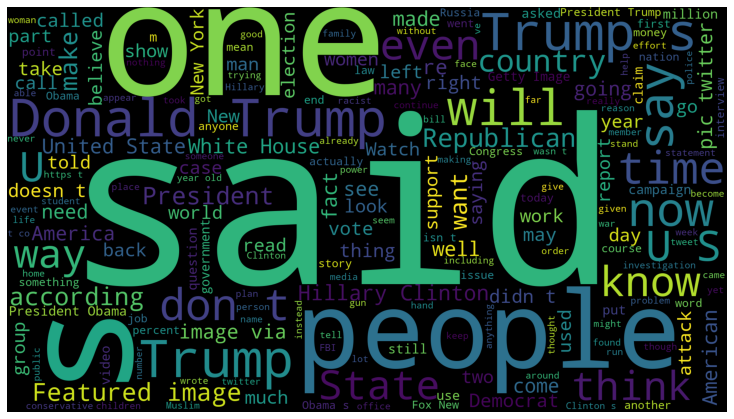

In [5]:
text = ' '.join(fake['text'].tolist())
wordcloud = WordCloud (width=1920, height=1080).generate (text)
fig = plt.figure(figsize=(10, 10))
plt.imshow (wordcloud)
plt.axis ('off')
plt.tight_layout (pad=0)
plt.imshow (wordcloud);

# exploring real news

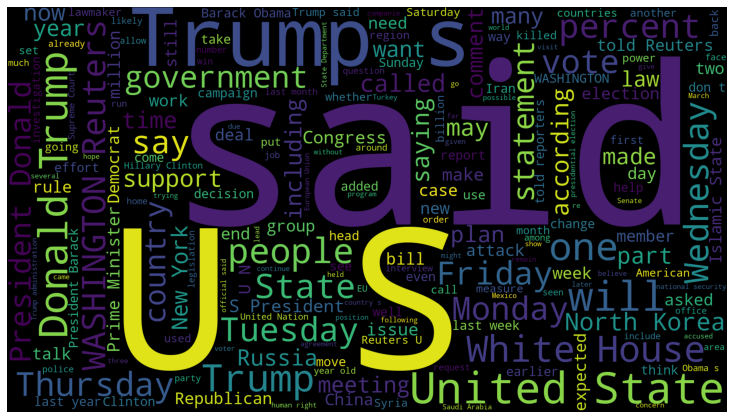

In [6]:
real = pd. read_csv('https://raw.githubusercontent.com/laxmimerit/fake-real-news-dataset/main/data/True.csv')
text = ' '.join(real ['text'].tolist())
wordcloud = WordCloud (width=1920, height=1080).generate (text)
fig = plt.figure(figsize=(10, 10))
plt.imshow (wordcloud)
plt.axis ('off')
plt.tight_layout (pad=0)
plt.imshow (wordcloud);

# Difference in Text

Real news seems to have source of publication which is not present in fake news set
Looking at the data:
* most of text contains reuters information such as "WASHINGTON (Reuters)".
* Some text are tweets from Twitter
* Few Text do not contain any publication info


# Difference in Text

Real news seems to have source of publication which is not present in fake news set
Looking at the data:
* most of text contains reuters information such as "WASHINGTON (Reuters)".
* Some text are tweets from Twitter
* Few Text do not contain any publication info


In [7]:
real.sample(5)

,title,text,subject,date
492,"Trump to visit Utah next week, expected to ann...",WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 28, 2017"
5062,No reason to believe Trump is target of any in...,WASHINGTON (Reuters) - There is no reason to b...,politicsNews,"March 8, 2017"
21296,Hard-right German party tells Trump to tweet less,BERLIN (Reuters) - The hard-right Alternative ...,worldnews,"August 28, 2017"
14998,United resumes Newark-Delhi flights after halt...,NEW YORK/SINGAPORE (Reuters) - United Airlines...,worldnews,"November 12, 2017"
275,"Ryan feels good about spending bill, wants bud...",WASHINGTON (Reuters) - House of Representative...,politicsNews,"December 7, 2017"


In [8]:
unknown_publishers = []
for index, row in enumerate(real.text.values):
 try:
   record = row.split('-', maxsplit=1)
   record[1]

   assert (len (record[0])<260)
 except:
   unknown_publishers.append(index)

In [9]:
real.iloc[unknown_publishers].text
publisher = []
tmp_text= []


for index, row in enumerate (real.text.values):
 if index in unknown_publishers:
    tmp_text.append(row)
    publisher.append('Unknown')
 else:
    record = row.split('-', maxsplit=1)
    publisher.append(record[0].strip())
    tmp_text.append(record[1].strip())

In [10]:
real['publishers']=publisher
real['text']=tmp_text
real.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [11]:
empty_fake_index= [index for index, text in enumerate (fake.text.tolist()) if str(text).strip()==""]
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [12]:
real['text'] = real['title'] + " " + real['text']
fake['text'] = fake['title'] + ""+fake['text']

real['text'] = real['text'].apply(lambda x: str(x).lower())
fake['text'] = fake['text'].apply(lambda x: str(x).lower())

# preprocessing text

In [13]:
real['class']=1
fake['class']=0

In [14]:
real=real[['text','class']]
fake=fake[['text','class']]

data = real.append(fake,ignore_index = True)
data.sample(5)

,text,class
19045,weakened dam looms as latest threat to puerto ...,1
10188,supreme court faces 4-4 split in obamacare con...,1
35963,germany’s angela merkel makes incredibly naive...,0
9065,senate blocks republican plan on 'watch list' ...,1
10369,trump without the hair? eu's migration policy ...,1


In [15]:
# https://github.com/laxmimerit/preprocess_kgptalkie
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.3 MB 25.2 MB/s 
     |████████████████████████████████| 211 kB 67.5 MB/s 
     |████████████████████████████████| 2.2 MB 81.8 MB/s 
     |████████████████████████████████| 3.7 MB 70.1 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.5
    Uninstalling srsly-2.4.5:
      Successfully uninstalled srsly-2.4.5
  Attempting uninstall: blis
    Found existing installation: blis 0.7.9
    Uninstalling blis-0.7.9:
      Successfully uninstalled blis-0.7.9
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.5
    Uninstalling thinc-8.1.5:
      Successfully uninstalled thinc-8.1.5
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: s

In [16]:
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/laxmimerit/preprocess_kgptalkie.git to /tmp/pip-req-build-js0va6l0
  Running command git clone -q https://github.com/laxmimerit/preprocess_kgptalkie.git /tmp/pip-req-build-js0va6l0
  Created wheel for preprocess-kgptalkie: filename=preprocess_kgptalkie-0.1.3-py3-none-any.whl size=11755 sha256=bf7fdc2be1f0d2711c231143fde61fc70b7c62cb2902fb503461477264721643
  Stored in directory: /tmp/pip-ephem-wheel-cache-ap1k4co3/wheels/fd/71/47/e04f208ad659a295ccb69022e14de7d20ccc6fc30a5a935f09
Successfully built preprocess-kgptalkie


In [17]:
import preprocess_kgptalkie as ps

In [18]:
data['text'] = data['text'].apply(lambda x: ps.remove_special_chars(x))

In [19]:
ps.remove_special_chars('this,. @ # is gre@t')
'this is gret'

'this is gret'

In [20]:
data.head()

,text,class
0,as us budget fight looms republicans flip thei...,1
1,us military to accept transgender recruits on ...,1
2,senior us republican senator let mr mueller do...,1
3,fbi russia probe helped by australian diplomat...,1
4,trump wants postal service to charge much more...,1


# Vectorization -- Word2Vec
* Word2Vec is one of the most popular technique to learn word embeddings using shallow neural network. 
* It was developed by Tomas Mikolov in 2013 at Google.
* Word embedding is the most popular representation of document vocabulary. It is capable of capturing context of a word in a document, semantic and syntactic similarity, relation with other words, etc.

In [21]:
import gensim

In [22]:
y=data['class'].values

In [23]:
X=[d.split() for d in data['text'].tolist()]
type(X[0])

list

In [24]:
print(X[0])

['as', 'us', 'budget', 'fight', 'looms', 'republicans', 'flip', 'their', 'fiscal', 'script', 'the', 'head', 'of', 'a', 'conservative', 'republican', 'faction', 'in', 'the', 'us', 'congress', 'who', 'voted', 'this', 'month', 'for', 'a', 'huge', 'expansion', 'of', 'the', 'national', 'debt', 'to', 'pay', 'for', 'tax', 'cuts', 'called', 'himself', 'a', 'fiscal', 'conservative', 'on', 'sunday', 'and', 'urged', 'budget', 'restraint', 'in', '2018', 'in', 'keeping', 'with', 'a', 'sharp', 'pivot', 'under', 'way', 'among', 'republicans', 'us', 'representative', 'mark', 'meadows', 'speaking', 'on', 'cbs', 'face', 'the', 'nation', 'drew', 'a', 'hard', 'line', 'on', 'federal', 'spending', 'which', 'lawmakers', 'are', 'bracing', 'to', 'do', 'battle', 'over', 'in', 'january', 'when', 'they', 'return', 'from', 'the', 'holidays', 'on', 'wednesday', 'lawmakers', 'will', 'begin', 'trying', 'to', 'pass', 'a', 'federal', 'budget', 'in', 'a', 'fight', 'likely', 'to', 'be', 'linked', 'to', 'other', 'issues',

In [25]:
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences=X, size=DIM, window=10, min_count=1)

In [26]:
len(w2v_model.wv.vocab)

240387

In [27]:
w2v_model.wv['love']

array([-0.931953  , -2.9268367 ,  2.0194998 ,  1.8732221 ,  2.2342165 ,
        1.6255828 ,  2.0635464 ,  2.4534528 , -0.07056296,  1.4408169 ,
        2.292856  ,  0.364649  , -1.7110063 , -0.4012671 , -0.05945858,
        0.19104376,  1.6990869 , -1.8544098 ,  1.2944106 ,  0.34298852,
        4.542065  ,  1.8063321 , -0.8315935 ,  1.5607945 , -4.463758  ,
       -0.7166226 , -2.9595268 ,  1.8071799 ,  0.24526109, -0.7979407 ,
        0.5590397 ,  0.49237987,  0.19534189,  0.5651332 , -0.57136416,
        5.16429   , -2.285325  ,  0.46124303,  0.01676463, -4.182328  ,
        0.01450678, -0.5465321 , -6.3431945 , -2.7156765 , -1.0112109 ,
        3.7569733 ,  2.948183  ,  0.342523  , -2.5724974 , -1.0050426 ,
       -3.364906  , -5.877599  , -0.19750814, -3.6878066 , -2.1536267 ,
        2.076995  ,  2.4639158 , -3.6419268 ,  0.6372183 ,  0.45605025,
       -2.3031025 , -3.277215  , -1.0627573 , -1.8802384 , -1.9460703 ,
       -2.0729325 ,  0.92291164, -3.712866  ,  2.5643938 ,  2.38

In [28]:
w2v_model.wv.most_similar('trump')

[('trumps', 0.732133150100708),
 ('trumptrump', 0.60153728723526),
 ('trumpthe', 0.5555115938186646),
 ('he', 0.5545133352279663),
 ('himtrump', 0.5421417355537415),
 ('him', 0.5154159069061279),
 ('cruz', 0.5120307803153992),
 ('presidentelect', 0.5056127309799194),
 ('obama', 0.5005940794944763),
 ('trumpit', 0.4940584897994995)]

In [29]:
tokenizer = Tokenizer()

In [31]:
tokenizer.fit_on_texts(X)

In [32]:
X= tokenizer.texts_to_sequences(X)

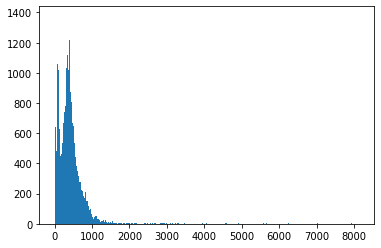

In [33]:
plt.hist([len(x) for x in X], bins = 700)
plt.show()

In [34]:
nos= np.array([len(x) for x in X])
len(nos [nos>1000])

1578

In [35]:
maxlen=1000
X = pad_sequences (X, maxlen=maxlen)

In [38]:
vocab_size = len(tokenizer.word_index) + 1
vocab=tokenizer.word_index

In [39]:
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size, DIM))  
  for word, i in vocab.items():
    weight_matrix[i] = model.wv [word]

  return weight_matrix
          

In [40]:
embedding_vectors=get_weight_matrix(w2v_model)

In [41]:
embedding_vectors.shape

(240388, 100)

In [42]:
model = Sequential()
model.add(Embedding(vocab_size, output_dim=DIM, weights = [embedding_vectors], input_length=maxlen, trainable=False))
model.add(LSTM(units=128))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         24038800  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 24,156,177
Trainable params: 117,377
Non-trainable params: 24,038,800
_________________________________________________________________


In [45]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

In [46]:
model.fit (X_train, y_train, validation_split=0.3, epochs=6)

Epoch 1/6
737/737 [==============================] - 756s 1s/step - loss: 0.1403 - acc: 0.9491 - val_loss: 0.1097 - val_acc: 0.9589
Epoch 2/6
737/737 [==============================] - 749s 1s/step - loss: 0.0835 - acc: 0.9735 - val_loss: 0.0881 - val_acc: 0.9683
Epoch 3/6
737/737 [==============================] - 751s 1s/step - loss: 0.0480 - acc: 0.9840 - val_loss: 0.0484 - val_acc: 0.9829
Epoch 4/6
737/737 [==============================] - 751s 1s/step - loss: 0.0207 - acc: 0.9928 - val_loss: 0.0298 - val_acc: 0.9904
Epoch 5/6
737/737 [==============================] - 750s 1s/step - loss: 0.0107 - acc: 0.9969 - val_loss: 0.0255 - val_acc: 0.9923
Epoch 6/6
737/737 [==============================] - 747s 1s/step - loss: 0.0120 - acc: 0.9962 - val_loss: 0.0256 - val_acc: 0.9917


In [47]:
y_pred = (model.predict(X_test) >= 0.5).astype(int)

351/351 [==============================] - 116s 327ms/step


In [48]:
accuracy_score(y_test, y_pred)

0.990913140311804

In [49]:
print(classification_report (y_test, y_pred))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      6019
           1       0.99      0.99      0.99      5206

    accuracy                           0.99     11225
   macro avg       0.99      0.99      0.99     11225
weighted avg       0.99      0.99      0.99     11225



In [50]:
x=['this is a news']

In [51]:
X_test

array([[    0,     0,     0, ...,  2785, 28076,   500],
       [    0,     0,     0, ...,   174,   394,   270],
       [    0,     0,     0, ...,    47,    26, 29843],
       ...,
       [    0,     0,     0, ...,     1,    14,    91],
       [    0,     0,     0, ...,    54,   123,   383],
       [ 2337,  6450,     3, ...,     9,    68,    46]], dtype=int32)

In [55]:
x = ['this is a news']
x = tokenizer.texts_to_sequences (x)
x = pad_sequences (x, maxlen=maxlen)

In [56]:
(model.predict(x) >=0.5).astype(int)

1/1 [==============================] - 0s 47ms/step


array([[0]])

In [59]:
x = ['Covid news live updates. Nearly 37 million people in China may have been infected with Covid-19 on a single day this week, Bloomberg News reported on Friday, citing estimates from the government\'s top health authority.About 248 million people, which is nearly 18% of the population, are likely to have contracted the virus in the first 20 days of December, the report said, citing minutes from an internal meeting of China\'s National Health Commission. Meanwhile, India has ramped up its precautionary measures to ensure early detection and management of virus spread. Stay with TOI for the latest developments']
x = tokenizer.texts_to_sequences (x)
x = pad_sequences (x, maxlen=maxlen)
(model.predict (x) >=0.5).astype (int)

1/1 [==============================] - 0s 47ms/step


array([[1]])